In [ ]:
# %%

# Import thư viện 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import SVR  # Import thuật toán SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # Để chuẩn hóa dữ liệu
import math

<class 'pandas.core.frame.DataFrame'>
Index: 10918 entries, 1 to 10918
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        10918 non-null  object 
 1   Open        10918 non-null  float64
 2   High        10918 non-null  float64
 3   Low         10918 non-null  float64
 4   Close       10918 non-null  float64
 5   Volume      10918 non-null  int64  
 6   Prev_close  10918 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 682.4+ KB


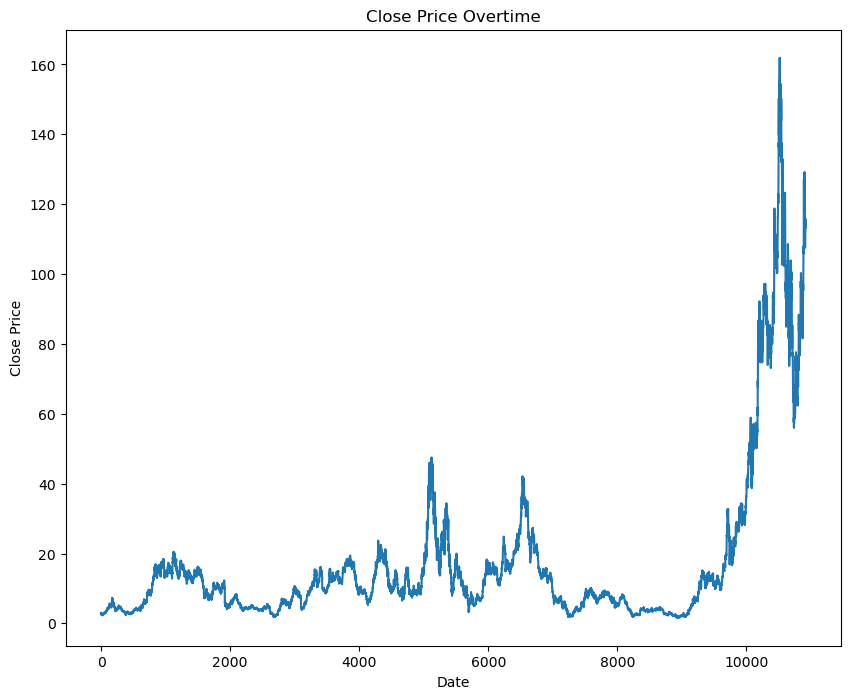

In [2]:
# %%

# Load dữ liệu
datafile = pd.read_csv("AMD (1980 -11.07.2023).csv")
datafile.head()

# Tạo cột 'Prev_close' để tính toán giá đóng cửa ngày hôm trước
series_shifted = datafile['Close'].shift()
datafile['Prev_close'] = series_shifted
datafile.head()

# Xóa cột 'Adj Close'
datafile = datafile.drop(columns=['Adj Close'])
datafile.head()

# Kiểm tra kích thước dữ liệu
datafile.shape

# Kiểm tra các giá trị null và loại bỏ chúng
datafile.isnull().sum()
datafile.dropna(inplace=True)
datafile

# Kiểm tra thông tin dữ liệu
datafile.info()

# Kiểm tra các thống kê mô tả
datafile.describe()

# Vẽ biểu đồ giá đóng cửa
datafile['Close'].plot(figsize=(10, 8))
plt.title("Close Price Overtime")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [ ]:
# %%

# Tạo X và y
X = datafile[['Open', 'Prev_close', 'High', 'Low']] 
y = datafile['Close']  # Nhãn

In [5]:
# %%

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Kiểm tra kích thước của tập huấn luyện và kiểm tra
print(X_train.shape, X_test.shape)

(8188, 4) (2730, 4)


In [6]:
# %%

# Chuẩn hóa dữ liệu
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))

In [7]:
# %%

# Khởi tạo mô hình SVR
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# Huấn luyện mô hình
svr_model.fit(X_train, y_train.ravel())

# In ra các tham số mô hình (cho SVR, không có coef_ và intercept như Linear Regression)
print("SVR model trained!")

SVR model trained!


In [8]:
# %%

# Dự đoán trên tập kiểm tra
y_pred = svr_model.predict(X_test)

# Đưa dữ liệu dự đoán về dạng gốc
y_test_actual = scaler_y.inverse_transform(y_test)
y_pred_actual = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# Tính toán các chỉ số đánh giá
rmse = math.sqrt(metrics.mean_squared_error(y_test_actual, y_pred_actual))
mae = metrics.mean_absolute_error(y_test_actual, y_pred_actual)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 0.87
MAE: 0.72


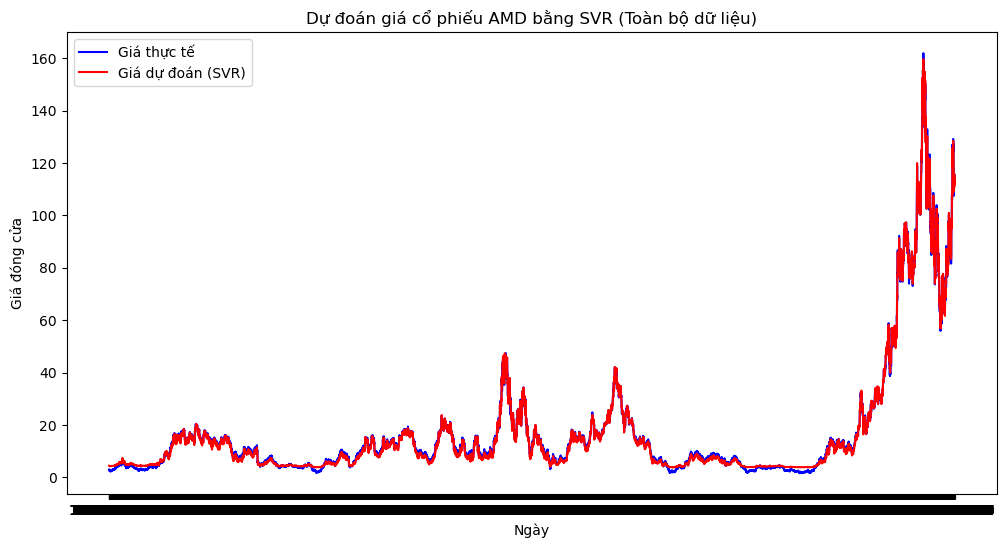

In [9]:
# %% 

# Dự đoán trên toàn bộ dữ liệu
y_full_pred = svr_model.predict(scaler_X.transform(X))

# Chuyển dữ liệu dự đoán về dạng gốc
y_full_pred_actual = scaler_y.inverse_transform(y_full_pred.reshape(-1, 1))

# Vẽ biểu đồ so sánh
plt.figure(figsize=(12, 6))
plt.plot(datafile['Date'], y, label="Giá thực tế", color='blue')
plt.plot(datafile['Date'], y_full_pred_actual, label="Giá dự đoán (SVR)", color='red')
plt.title("Dự đoán giá cổ phiếu AMD bằng SVR (Toàn bộ dữ liệu)")
plt.xlabel("Ngày")
plt.ylabel("Giá đóng cửa")
plt.legend()
plt.show()